# Estudando a composicao da base de dados

In [70]:
#ok
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def adeq(nome):
    '''funcao recebe o dimero no formato de saida do VarPar
    e retorna no formato de impressao'''
    cl=nome[:-2]
    tl=nome[2:]
    org=str()
    for i in range(2):
        #print(cl[i],tl[i])
        if i==0:
            org+=cl[i]+tl[i]
        else:
            org+="p"+cl[i]+tl[i]
    return org

def nn_ter(path):
    '''recebe o caminho do arquivo de saida do nn check
    e retona um dataframe com os dimeros terminais e suas frequencias'''
    li=[]#lista de seq 5' dos trimeros
    lf=[]#lista de seq 3' dos trimeros
    dimersi=[]#lista de dimeros 5'
    dimersf=[]#lista de dimeros 3'
    dimersf_count=[] #numero de dimeros 
    dimersi_count=[]
    #abre o arquivo com o caminho dado
    with open(path) as file:
        # varre cada linha do arquivo
        for line in file:
            #procur a linha que comeca com Trimer_set (NP): (N), onde N eh um numero
            m = re.match(r"^Trimers_set\s+\(NP\):\s*\(\d+\)", line)
            # quando a condicao eh satisfeita
            if m:
                #divide a linha por espacos
                l=line.strip().split(" ")
                #para cada termo da linha
                for i in l:
                    #se o termo comeca por _
                    if i.startswith("_"):
                        #estoca na lista inicial
                        li.append(i)
                    #se termina com _
                    if i.split("/")[0].endswith("_"):
                        #coloca na lista final
                        lf.append(i)
    for i in lf:
        if i[0].split("_/") not in dimersi:
            dimersi.append(i.split("_/")[0]+i.split("_/")[1].split("_")[0])
            dimersi_count.append(int(i.split("=")[1]))
    df1=pd.DataFrame({"nn":dimersi,
                     "count":dimersi_count})
    for i in li:
        dimersf.append(i.split('/_')[0].split("_")[1]+i.split('/_')[1].split("=")[0])
        dimersf_count.append(int(i.split('/_')[1].split("=")[1]))
    df2=pd.DataFrame({"nn":dimersf,
                     "count":dimersf_count})
    df=pd.concat([df1, df2])
    df=df.groupby("nn", as_index=False)["count"].sum()
    df["nn"] = df["nn"].apply(adeq)
    return df

def nn_int(path):
    dmr=[]
    cnt=[]
    target_line = None  
    with open(path) as f:
        lines = f.readlines()
    for i, line in enumerate(lines):
        line = line.strip()
        if re.match(r"\d+\s+unique nearest-neighbours in dataset\s+\(NP\+P, NN symmetry reduced\)", line):
            if i + 1 < len(lines):
                next_line = lines[i + 1].strip()
                if next_line.startswith("Neighbours set"):
                    target_line = next_line
                    break
    p=target_line.strip().split()[3:]
    for i in p:
        dmr.append(i.split("=")[0])
        cnt.append(int(i.split("=")[1]))
    dfi=pd.DataFrame({"nn":dmr,"count":cnt})
    return dfi

def fig(df, titulo="Titulo", xlabel="X", ylabel="Y"):
    plt.figure(figsize=(10,6))
    plt.bar(df["nn"], df["count"], width=0.7)
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()  # Melhora o espaçamento
    plt.show()

# Caso BS

In [71]:
#caminho do arquivo
path="/home/daniel/Desktop/geraldao/dados/NM/rna_nm/120mm/2ome.nncheck"
#dataframe de dimeros terminais e suas frequencias
df_f=nn_ter(path)
df_i=nn_int(path)

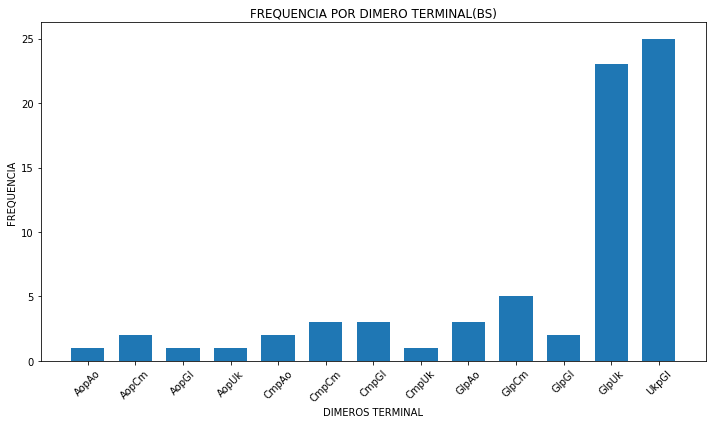

In [77]:
titulo="FREQUENCIA POR DIMERO TERMINAL(BS)"
xlabel="DIMEROS TERMINAL"
ylabel="FREQUENCIA"
fig(nn_ter(path),titulo,xlabel,ylabel)

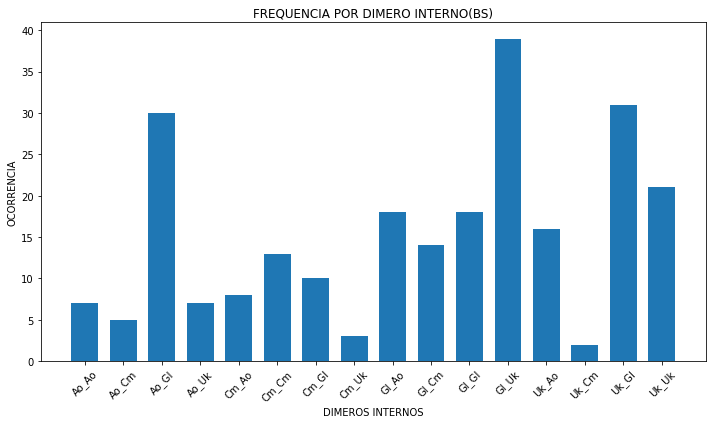

In [78]:
titulo="FREQUENCIA POR DIMERO INTERNO(BS)"
xlabel="DIMEROS INTERNOS"
ylabel="OCORRENCIA"
fig(nn_int(path),titulo,xlabel,ylabel)

# Caso AS

In [79]:
#caminho do arquivo
path="/home/daniel/Desktop/geraldao/dados/NM/rna_nm/1020mm/2ome.nncheck"
#dataframe de dimeros terminais e suas frequencias
df_f=nn_ter(path)
df_i=nn_int(path)

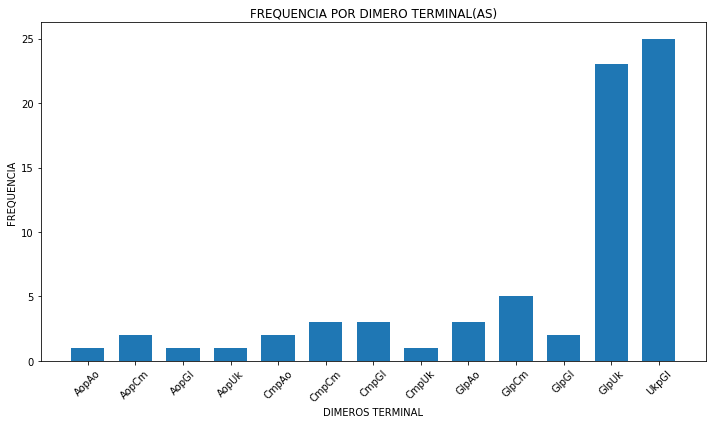

In [80]:
titulo="FREQUENCIA POR DIMERO TERMINAL(AS)"
xlabel="DIMEROS TERMINAL"
ylabel="FREQUENCIA"
fig(nn_ter(path),titulo,xlabel,ylabel)

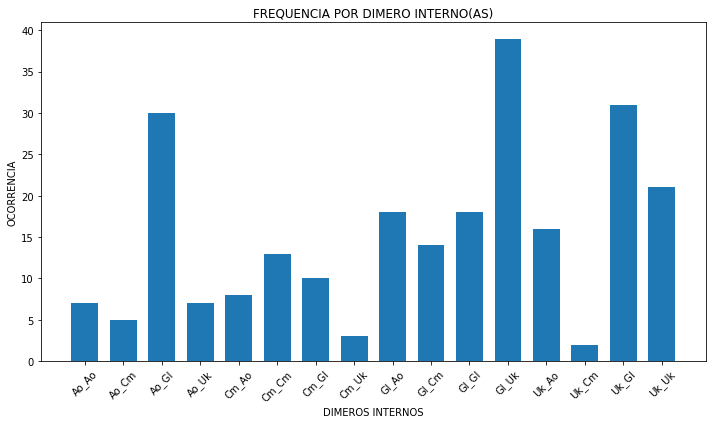

In [81]:
titulo="FREQUENCIA POR DIMERO INTERNO(AS)"
xlabel="DIMEROS INTERNOS"
ylabel="OCORRENCIA"
fig(nn_int(path),titulo,xlabel,ylabel)